In [130]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [131]:
# Import dataset

data_set = 'https://github.com/arghajit29/DS0522/raw/main/Data%20Science/Projects/medical_cost_insurance.csv'

data = pd.read_csv(data_set)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [132]:
# Rows and columns of the data set

data.shape

(1338, 7)

In [133]:
# Getting information about the dataset and the datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


__Categorical Features in the Data Set:__

* Sex
* Smoker
* Region

In [134]:
# Check for missing values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [135]:
# Statistical Data analysis

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


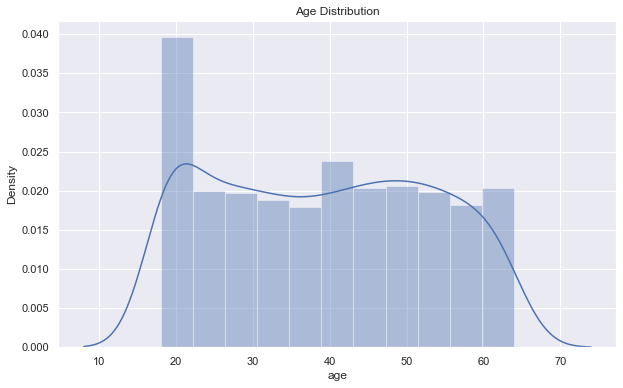

In [136]:
# Distribution of age value

sns.set()
plt.figure(figsize=(10,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

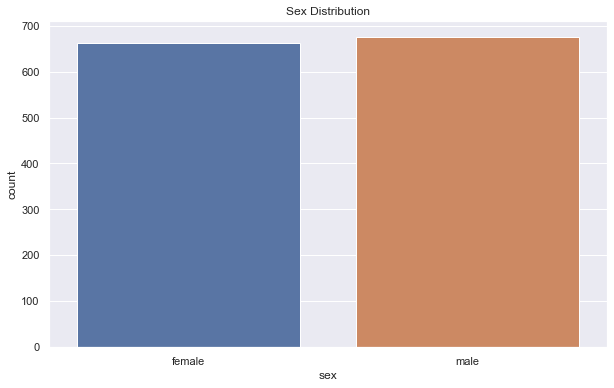

In [137]:
# Distribution of sex value

sns.set()
plt.figure(figsize=(10,6))
sns.countplot(data['sex'])
plt.title('Sex Distribution')
plt.show()

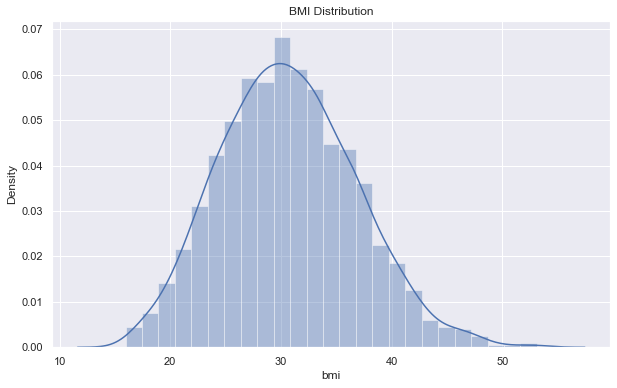

In [138]:
# Distribution of bmi value

sns.set()
plt.figure(figsize=(10,6))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range is 18.5 to 24.9

BMI < 18.5 = Underweight<br>
BMI > 24.9 = Overweight<br>
BMI > 30 = Obese

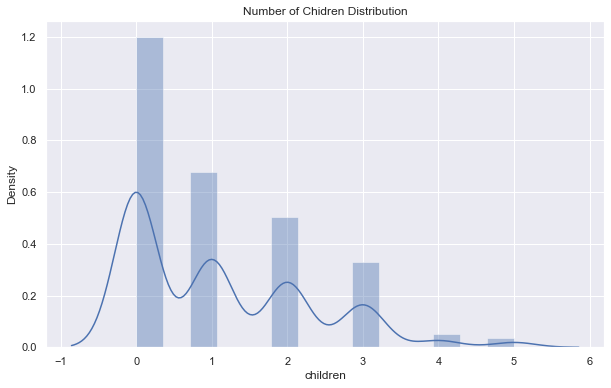

In [139]:
# Distribution of number of children value

sns.set()
plt.figure(figsize=(10,6))
sns.distplot(data['children'])
plt.title('Number of Chidren Distribution')
plt.show()

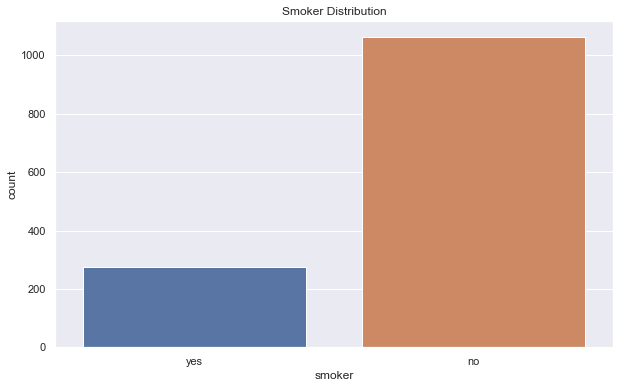

In [140]:
# Distribution of smoker value

sns.set()
plt.figure(figsize=(10,6))
sns.countplot(data['smoker'])
plt.title('Smoker Distribution')
plt.show()

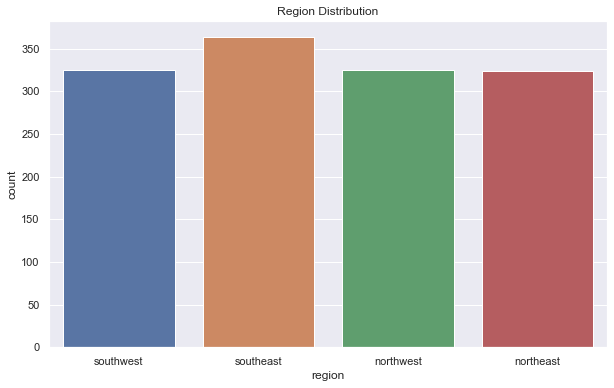

In [141]:
# Distribution of region value

sns.set()
plt.figure(figsize=(10,6))
sns.countplot(data['region'])
plt.title('Region Distribution')
plt.show()

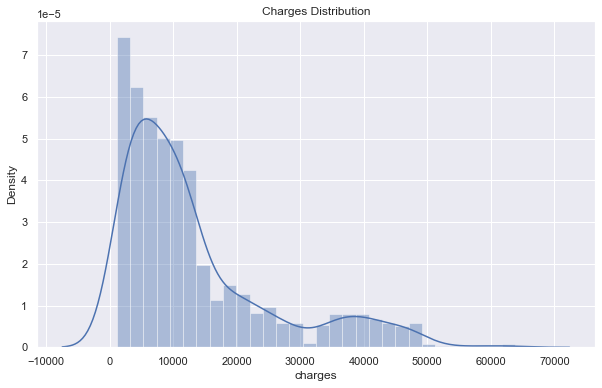

In [142]:
# Distribution of number of charges value

sns.set()
plt.figure(figsize=(10,6))
sns.distplot(data['charges'])
plt.title('Charges Distribution')
plt.show()

In [143]:
# Data Preprocessing

from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()

In [144]:
df1 = lbl_enc.fit_transform(data['sex'])
pd.Series(df1)

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Length: 1338, dtype: int32

In [145]:
df2 = lbl_enc.fit_transform(data['smoker'])
pd.Series(df2)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Length: 1338, dtype: int32

In [146]:
df3 = lbl_enc.fit_transform(data['region'])
pd.Series(df2)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Length: 1338, dtype: int32

In [147]:
data['sex'] = df1
data['smoker'] = df2
data['region'] = df3
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


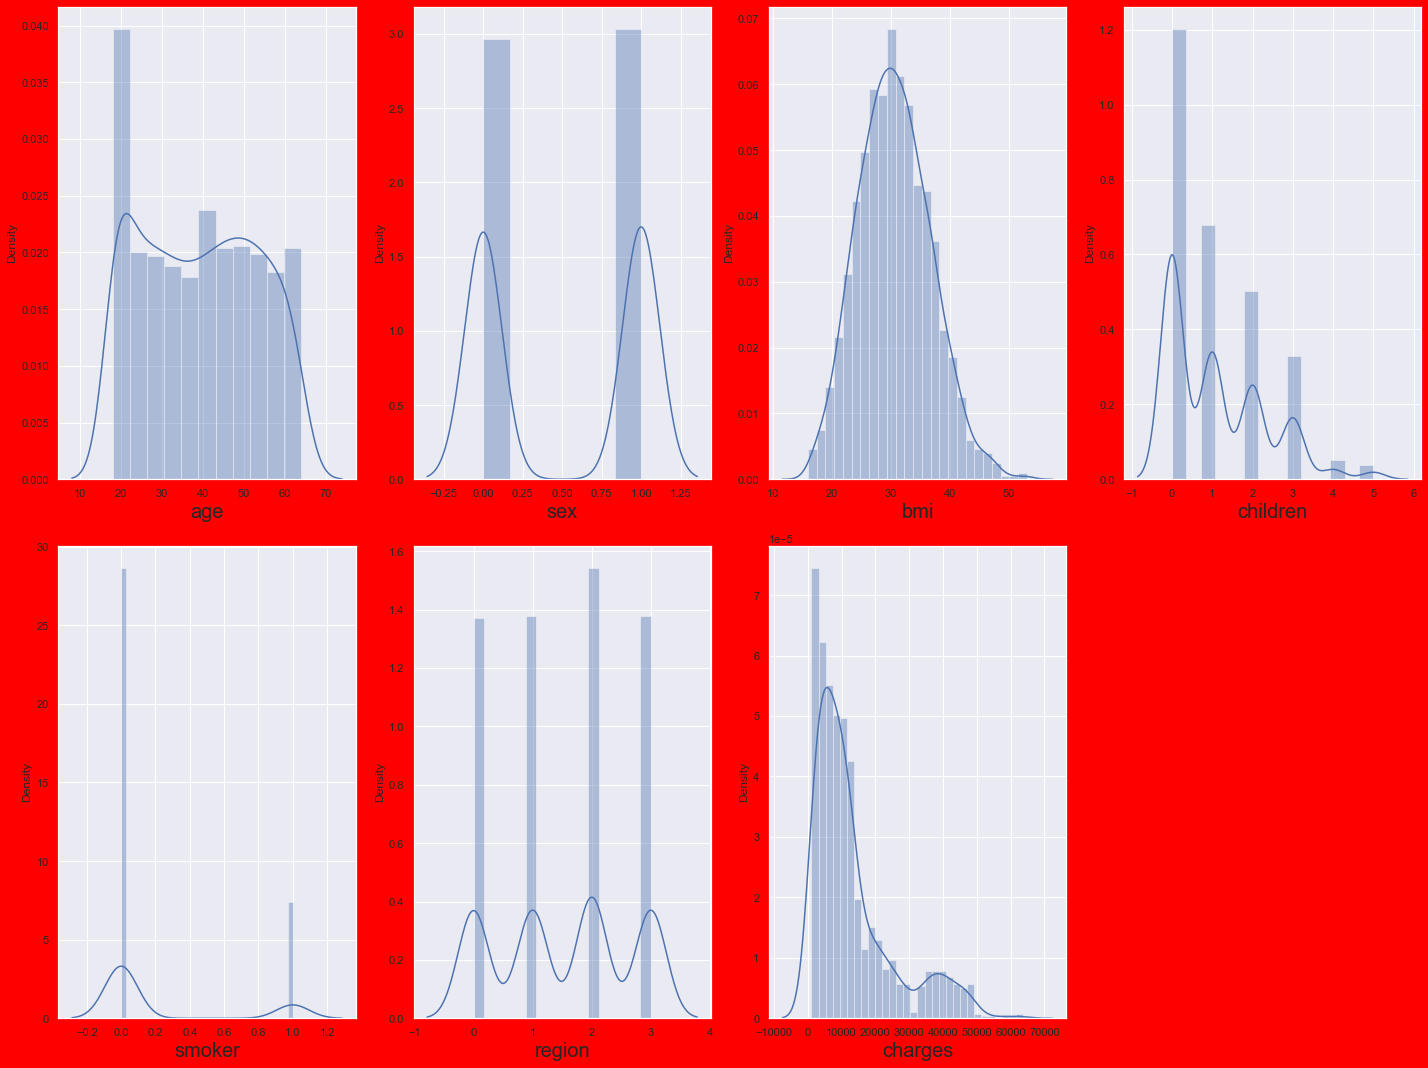

In [148]:
plt.figure(figsize=(20,15), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <= 7:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.tight_layout()

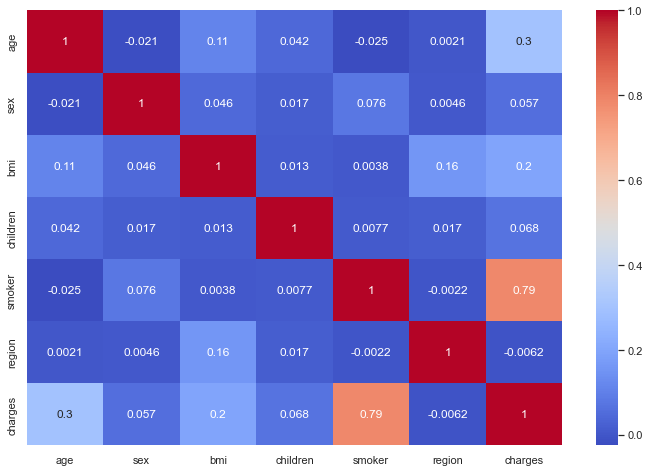

In [149]:
data_corr = data.corr()

plt.figure(figsize = (12,8))
sns.heatmap(data_corr, annot=True, cmap='coolwarm')
plt.show()

In [150]:
# Data Normalizastion

data.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [151]:
data.corr()['charges']

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

In [152]:
from scipy.stats import zscore

z = np.abs(zscore(data))
z.shape

(1338, 7)

In [153]:
threshold = 3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [154]:
len(np.where(z>3)[0])

29

In [155]:
df = data[(z<3).all(axis=1)]
print('Old Dataframe', data.shape)
print('New Dataframe', df.shape)
print('Total dropped rows :', data.shape[0] - df.shape[0])

Old Dataframe (1338, 7)
New Dataframe (1309, 7)
Total dropped rows : 29


In [156]:
# Splitting dataset into Features and Labels

y = df['charges']
X = df.drop(['charges'],axis=1)

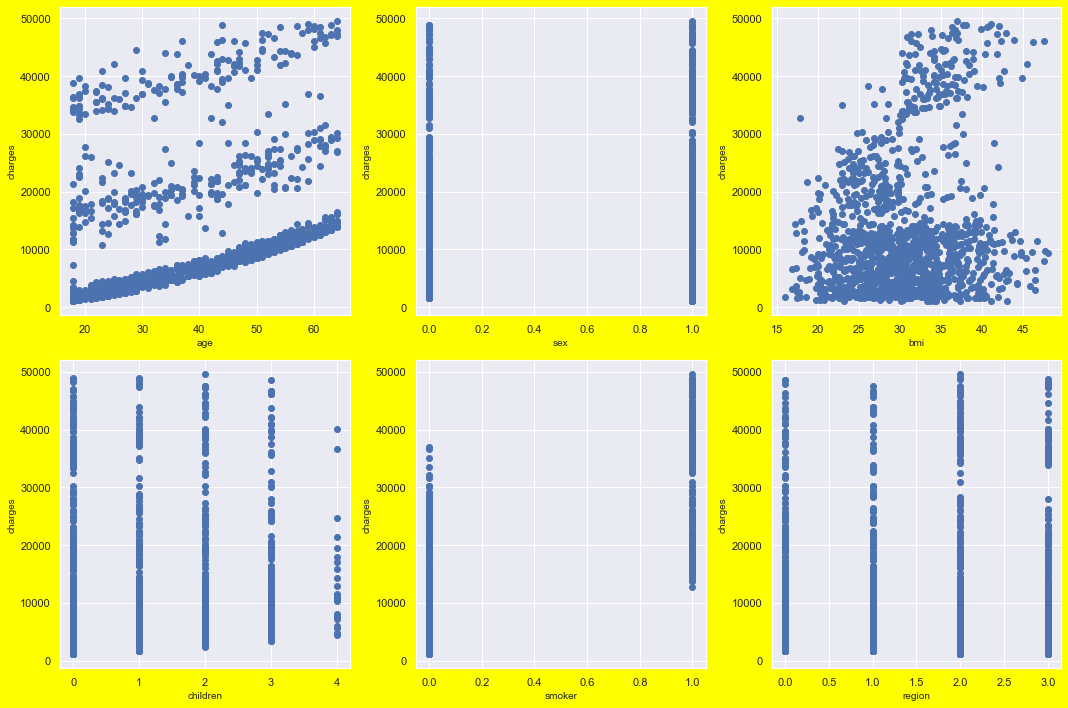

In [157]:
plt.figure(figsize=(15,10), facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 6:
        ax = plt.subplot(2,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('charges',fontsize=10)
    plotnumber += 1
plt.tight_layout()

In [158]:
# Scaling data using power_transform

from sklearn.preprocessing import power_transform

X = power_transform(X, method='yeo-johnson')
X

array([[-1.52338838, -1.00536197, -0.41533151, -1.0686717 ,  1.98484827,
         1.2923832 ],
       [-1.61486488,  0.99466663,  0.56155224,  0.32286499, -0.50381685,
         0.49381372],
       [-0.76526073,  0.99466663,  0.43769977,  1.4202725 , -0.50381685,
         0.49381372],
       ...,
       [-1.61486488, -1.00536197,  1.04555528, -1.0686717 , -0.50381685,
         0.49381372],
       [-1.34540925, -1.00536197, -0.78526808, -1.0686717 , -0.50381685,
         1.2923832 ],
       [ 1.46003406, -1.00536197, -0.2142488 , -1.0686717 ,  1.98484827,
        -0.38980688]])

In [159]:
pd.DataFrame(X).skew().sort_values()

5   -0.167549
0   -0.101636
2   -0.012857
1   -0.010708
3    0.098891
4    1.482731
dtype: float64

In [160]:
# Importing all the dependencies to train the models

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
lin = LinearRegression()
lin.fit(x_train,y_train)

knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

sv = SVR()
sv.fit(x_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

print("All models have been trained")

All models have been trained


In [162]:
y_pred1 = lin.predict(x_test)
y_pred2 = knn.predict(x_test)
y_pred3 = dtr.predict(x_test)
y_pred4 = rfr.predict(x_test)
y_pred5 = sv.predict(x_test)
y_pred6 = gbr.predict(x_test)

df_pred = pd.DataFrame({'Actual': y_test,
                        'LR pred': y_pred1,
                        'KNN pred': y_pred2,
                        'DT pred': y_pred3,
                        'RF pred': y_pred4,
                        'SVR pred': y_pred5,
                        'GBR pred': y_pred6})

df_pred

,Actual,LR pred,KNN pred,DT pred,RF pred,SVR pred,GBR pred
1172,11093.62290,15204.103409,15065.106268,24227.33724,16534.236922,9440.354437,13609.068680
1069,10928.84900,12625.870911,14286.564632,27322.73386,15453.981503,9427.216683,16620.177908
1001,34472.84100,27204.895134,35788.207200,36197.69900,35506.525768,9447.577769,35395.499283
821,2680.94930,180.310682,9692.208000,21595.38229,11358.126900,9375.702921,7265.900828
1219,7537.16390,9404.749025,7398.062620,7281.50560,7202.881974,9384.676020,7947.042422
...,...,...,...,...,...,...,...
583,17626.23951,4564.875745,5040.220660,4562.84210,5000.231487,9346.885394,4788.761092
144,20745.98910,29908.985568,26075.538448,19933.45800,20675.244657,9462.583678,20762.324856
1206,36910.60803,14623.615998,12673.894000,12347.17200,13760.668653,9438.205057,13343.369982
317,10435.06525,12925.126920,11770.174540,10422.91665,11170.428473,9438.678864,12417.056899


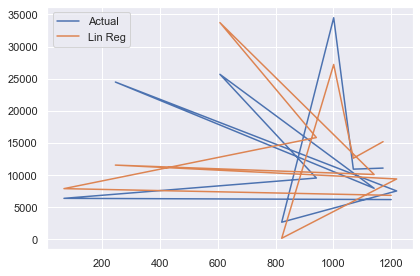

In [163]:
plt.subplot()
plt.plot(df_pred['Actual'].iloc[0:11], label='Actual')
plt.plot(df_pred['LR pred'].iloc[0:11], label='Lin Reg')
plt.legend()

plt.tight_layout()

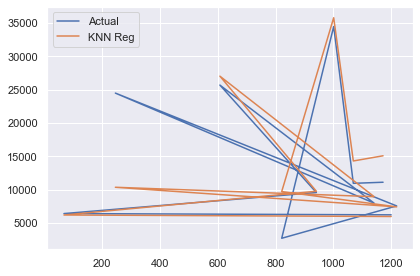

In [164]:
plt.subplot()
plt.plot(df_pred['Actual'].iloc[0:11], label='Actual')
plt.plot(df_pred['KNN pred'].iloc[0:11], label='KNN Reg')
plt.legend()

plt.tight_layout()

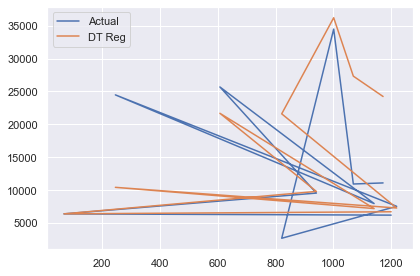

In [165]:
plt.subplot()
plt.plot(df_pred['Actual'].iloc[0:11], label='Actual')
plt.plot(df_pred['DT pred'].iloc[0:11], label='DT Reg')
plt.legend()

plt.tight_layout()

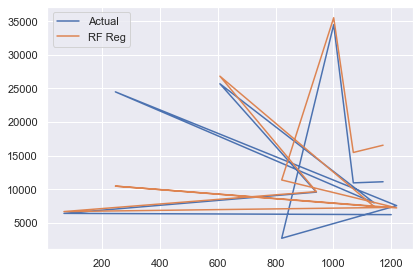

In [166]:
plt.subplot()
plt.plot(df_pred['Actual'].iloc[0:11], label='Actual')
plt.plot(df_pred['RF pred'].iloc[0:11], label='RF Reg')
plt.legend()

plt.tight_layout()

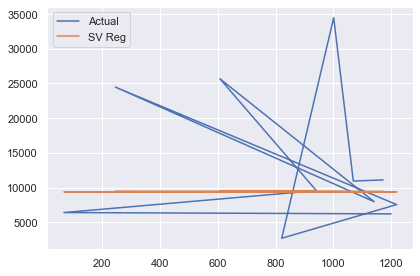

In [167]:
plt.subplot()
plt.plot(df_pred['Actual'].iloc[0:11], label='Actual')
plt.plot(df_pred['SVR pred'].iloc[0:11], label='SV Reg')
plt.legend()

plt.tight_layout()

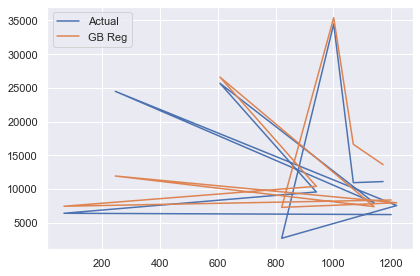

In [168]:
plt.subplot()
plt.plot(df_pred['Actual'].iloc[0:11], label='Actual')
plt.plot(df_pred['GBR pred'].iloc[0:11], label='GB Reg')
plt.legend()

plt.tight_layout()

In [169]:
r2_score1_lin = metrics.r2_score(y_test, y_pred1)
r2_score2_knn = metrics.r2_score(y_test, y_pred2)
r2_score3_dtr = metrics.r2_score(y_test, y_pred3)
r2_score4_rfr = metrics.r2_score(y_test, y_pred4)
r2_score5_svr = metrics.r2_score(y_test, y_pred5)
r2_score6_gbr = metrics.r2_score(y_test, y_pred6)

In [170]:
print(r2_score1_lin,r2_score2_knn,r2_score3_dtr, r2_score4_rfr, r2_score5_svr, r2_score6_gbr)

0.7762142327076634 0.8202215693801903 0.7079639326183774 0.8702938668468876 -0.10781744850036046 0.8950817009494938


In [171]:
mae1 = metrics.mean_absolute_error(y_test, y_pred1)
mae2 = metrics.mean_absolute_error(y_test, y_pred2)
mae3 = metrics.mean_absolute_error(y_test, y_pred3)
mae4 = metrics.mean_absolute_error(y_test, y_pred4)
mae5 = metrics.mean_absolute_error(y_test, y_pred5)
mae6 = metrics.mean_absolute_error(y_test, y_pred6)

mse1 = metrics.mean_squared_error(y_test,y_pred1)
mse2 = metrics.mean_squared_error(y_test,y_pred2)
mse3 = metrics.mean_squared_error(y_test,y_pred3)
mse4 = metrics.mean_squared_error(y_test,y_pred4)
mse5 = metrics.mean_squared_error(y_test,y_pred5)
mse6 = metrics.mean_squared_error(y_test,y_pred6)

rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)
rmse3 = np.sqrt(mse3)
rmse4 = np.sqrt(mse4)
rmse5 = np.sqrt(mse5)
rmse6 = np.sqrt(mse6)

In [172]:
print(mae1,'\n',mse1,'\n',rmse1)

4049.730464836033 
 30791255.2855698 
 5548.986870192593


In [173]:
print(mae2,'\n',mse2,'\n',rmse2)

3120.4839751519085 
 24736173.435115602 
 4973.547369344702


In [174]:
print(mae3,'\n',mse3,'\n',rmse3)

2901.661523492367 
 40181988.3906859 
 6338.926438340005


In [175]:
print(mae4,'\n',mse4,'\n',rmse4)

2290.4439273805724 
 17846598.13867599 
 4224.523421485078


In [176]:
print(mae5,'\n',mse5,'\n',rmse5)

8308.046259326586 
 152427432.17902264 
 12346.150500420066


In [177]:
print(mae6,'\n',mse6,'\n',rmse6)

2045.6679397893515 
 14435976.734712213 
 3799.4705861096245


In [178]:
input_data = (28, 0, 28.88, 1, 0, 0)
input_data_np_array = np.asarray(input_data)
input_data_reshape = input_data_np_array.reshape(1,-1)

In [179]:
lin_pred = lin.predict(input_data_reshape)
knn_pred = knn.predict(input_data_reshape)
dtr_pred = dtr.predict(input_data_reshape)
rfr_pred = rfr.predict(input_data_reshape)
svr_pred = sv.predict(input_data_reshape)
gbr_pred = gbr.predict(input_data_reshape)

In [180]:
print(lin_pred)

[168675.86666785]


In [181]:
print(knn_pred)

[13234.92821]


In [182]:
print(dtr_pred)

[16069.08475]


In [183]:
print(rfr_pred)

[16000.4038492]


In [184]:
print(svr_pred)

[9432.59762238]


In [185]:
print(gbr_pred)

[16159.94284088]


In [187]:
# Save model using joblib

# As the Gradient Boosting Regression model is having the best accuracy, we would consider that only, and so for that 
# we would train the entire dataset for future usage

gbr = GradientBoostingRegressor()
gbr.fit(X, y)

GradientBoostingRegressor()

In [188]:
import joblib

In [189]:
joblib.dump(gbr, 'Best_model_GBR')

['Best_model_GBR']

In [190]:
model = joblib.load('Best_model_GBR')

In [191]:
model.predict(input_data_reshape)

array([16271.53104249])